In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

rop = pd.read_csv('C:/Users/hp/Desktop/Data Science/Specialization Project/rop.csv')

In [13]:
rop = rop.dropna()
rop = rop.set_index(rop['Date'])
rop['Date'] = pd.to_datetime(rop['Date'])
rop['Day'] = rop['Date'].dt.day
rop['Month'] = rop['Date'].dt.month_name()
rop['cdate'] = rop['Month']+'-'+rop['Day'].astype('str')
rop = rop.set_index(rop['cdate'])
rop

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,ndate,cdate
cdate,,,,,,,,,,,
January-2,2020-01-02,61.599998,61.599998,60.639999,61.180000,61.180000,486873.0,2,January,January-2,January-2
January-3,2020-01-03,61.180000,64.089996,61.130001,63.049999,63.049999,885861.0,3,January,January-3,January-3
January-6,2020-01-06,63.709999,64.720001,62.639999,63.270000,63.270000,724236.0,6,January,January-6,January-6
January-7,2020-01-07,62.910000,63.150002,62.110001,62.700001,62.700001,582649.0,7,January,January-7,January-7
January-8,2020-01-08,62.840000,65.650002,59.150002,59.610001,59.610001,1205710.0,8,January,January-8,January-8
...,...,...,...,...,...,...,...,...,...,...,...
October-8,2020-10-08,39.990002,41.330002,39.759998,41.189999,41.189999,409787.0,8,October,October-8,October-8
October-9,2020-10-09,41.310001,41.470001,40.380001,40.599998,40.599998,331703.0,9,October,October-9,October-9
October-12,2020-10-12,40.400002,40.450001,39.040001,39.430000,39.430000,322035.0,12,October,October-12,October-12


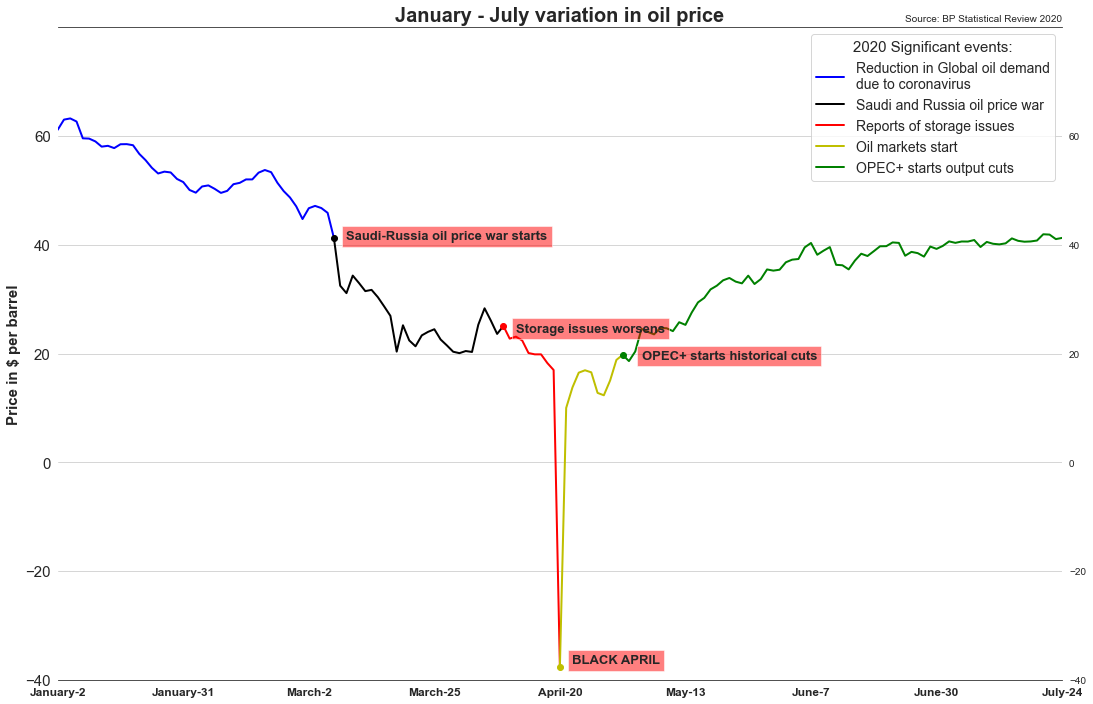

In [17]:
fig, ax = plt.subplots(figsize = (18,12))
plt.ylim(15,80)
plt.xlim(5,140)
ax.plot(0,0,'k:',lw=5)
ax.plot(rop['cdate'].loc[:'March-6'], rop['Adj Close'].loc[:'March-6'], 'b', lw = 2,label = 'Reduction in Global oil demand\ndue to coronavirus')
ax.plot(rop['cdate'].loc['March-6'], rop['Adj Close'].loc['March-6'], 'ko')
ax.plot(rop['cdate'].loc['March-6':'April-8'], rop['Adj Close'].loc['March-6':'April-8'], 'k', lw = 2,label = 'Saudi and Russia oil price war')
ax.plot(rop['cdate'].loc['April-8'], rop['Adj Close'].loc['April-8'], 'ro')
ax.plot(rop['cdate'].loc['April-8':'April-20'], rop['Adj Close'].loc['April-8':'April-20'], 'r', lw = 2,label = 'Reports of storage issues')
ax.plot(rop['cdate'].loc['April-20'], rop['Adj Close'].loc['April-20'], 'yo', lw = 2)
ax.plot(rop['cdate'].loc['April-20':'May-1'], rop['Adj Close'].loc['April-20':'May-1'], 'y', lw = 2,label = 'Oil markets start ')
ax.plot(rop['cdate'].loc['May-1'], rop['Adj Close'].loc['May-1'], 'go', lw = 2)
ax.plot(rop['cdate'].loc['May-1':'July-31'], rop['Adj Close'].loc['May-1':'July-31'], 'g', lw = 2,label = 'OPEC+ starts output cuts')
plt.xticks(np.arange(0,161,20))
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks([-40,-20,0,20,40,60])
plt.yticks(fontsize = 15)
ax.spines['right'].set_visible(False)                        
ax.spines['left'].set_visible(False)
plt.tick_params(labeltop = False, labelright = True)                             
plt.grid(which = 'major', axis = 'y')
plt.ylabel('Price in $ per barrel', fontsize = 15, fontweight = 'bold')
plt.text(46, 41,'Saudi-Russia oil price war starts',fontsize = 13,fontweight = 'bold',bbox=dict(facecolor='red', alpha=0.5))
plt.text(73, 24,'Storage issues worsens',fontsize = 13,fontweight = 'bold',bbox=dict(facecolor='red', alpha=0.5))
plt.text(82, -37,'BLACK APRIL',fontsize = 13,fontweight = 'bold',bbox=dict(facecolor='red', alpha=0.5))
plt.text(93, 19,'OPEC+ starts historical cuts',fontsize = 13,fontweight = 'bold',bbox=dict(facecolor='red', alpha=0.5))
plt.legend(loc = 'upper right', fontsize = 14, title = '2020 Significant events:', title_fontsize = 15, markerfirst = True, fancybox = True)
plt.title('January - July variation in oil price', fontsize = 20, fontweight = 'bold', loc = 'center')
plt.title('Source: BP Statistical Review 2020', fontsize = 10, loc = 'right')
plt.savefig('C:/Users/hp/Desktop/Data Science/Specialization Project/ass7.1.png', dpi = 300)